In [1]:
'''ML lab 07-2: Meet MNIST Dataset'''

'ML lab 07-2: Meet MNIST Dataset'

In [7]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [33]:
import random
import matplotlib.pyplot as plt

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
nb_classes = 10

In [10]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [11]:
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [12]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [13]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [18]:
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))

In [20]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [41]:
training_epochs = 30

In [42]:
batch_size = 50

Epoch:  0001 cost= 1.791261183
Epoch:  0002 cost= 0.829826685
Epoch:  0003 cost= 0.683649916
Epoch:  0004 cost= 0.610936538
Epoch:  0005 cost= 0.559795370
Epoch:  0006 cost= 0.525716509
Epoch:  0007 cost= 0.496113054
Epoch:  0008 cost= 0.479503864
Epoch:  0009 cost= 0.457265475
Epoch:  0010 cost= 0.442449223
Epoch:  0011 cost= 0.428317420
Epoch:  0012 cost= 0.419641218
Epoch:  0013 cost= 0.407641368
Epoch:  0014 cost= 0.397059978
Epoch:  0015 cost= 0.392245017
Epoch:  0016 cost= 0.383183465
Epoch:  0017 cost= 0.374604718
Epoch:  0018 cost= 0.369739086
Epoch:  0019 cost= 0.364155316
Epoch:  0020 cost= 0.358050836
Epoch:  0021 cost= 0.353201824
Epoch:  0022 cost= 0.349835765
Epoch:  0023 cost= 0.342181960
Epoch:  0024 cost= 0.342229434
Epoch:  0025 cost= 0.335031796
Epoch:  0026 cost= 0.334648992
Epoch:  0027 cost= 0.329284516
Epoch:  0028 cost= 0.326270312
Epoch:  0029 cost= 0.324663256
Epoch:  0030 cost= 0.322142866
Accuracy:  0.9082
Label: [5]
Prediction: [8]


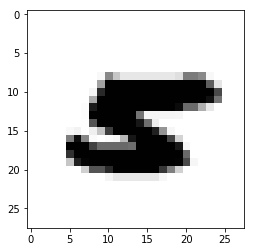

In [43]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer],
                           feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch: ', '%04d' % (epoch + 1), 'cost=', '{:.9f}'.format(avg_cost))
        
    print("Accuracy: ", accuracy.eval(session=sess,
                feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples -1) #random number
    batch_xs, batch_ys = mnist.train.next_batch(100)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r + 1],1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1),
                                 feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].
              reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()